In [1]:
from Geo877_Alivand import *
from Geo877_Alivand import find_connected_components, get_largest_component, filter_graph, MergeMitnodes, preprocess_gdf, preprocess_gdf_to_edge_list, Graph, Graph_matrix
import os
import getpass
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import MultiLineString, Point, LineString
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv

C:\Users\wlq92\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wlq92\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{0: [(1, 287.8052119790356), (3, 119.97565484233618)], 1: [(0, 287.8052119790356), (4065, 146.73822732140198), (4484, 241.07669980343456)], 2: [(3, 207.08334165478638)], 3: [(2, 207.08334165478638), (0, 119.97565484233618), (4065, 35.795677045306526)], 4: [(5, 333.26780078465526), (199, 823.290263045083), (216, 132.35009038268765), (263, 601.6051476165383)], 5: [(4, 333.26780078465526), (4107, 230.74505436806322)], 6: [(7, 258.03955325216623), (209, 174.97125400772595), (257, 88.67481497140122)], 7: [(6, 258.03955325216623), (4065, 19.737908387161536), (4269, 3.019878156346399)], 8: [(9, 665.3155605726228), (2392, 184.5596411374344)], 9: [(8, 665.3155605726228), (365, 160.81974618790815), (395, 352.457001906526)], 10: [(11, 1089.2234876855516), (658, 121.68672752370861)], 11: [(10, 1089.2234876855516), (284, 1151.3977750659863)], 12: [(13, 792.2442240200959), (16, 859.9836491016474), (33, 530.8856540506268)], 13: [(12, 792.2442240200959), (28, 123.2433667421443), (196, 24.3386642623710

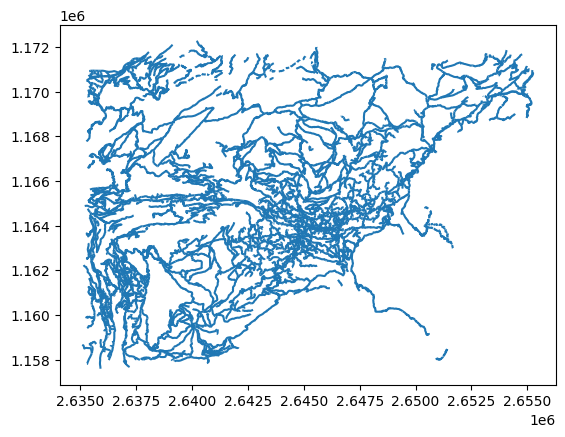

In [2]:
if __name__ == "__main__":
    #gdf = gpd.read_file('../data/Roads_small.gpkg') #change the path
    #gdf = gpd.read_file('/Users/baoyuliu/Documents/GitHub/G877_Alivand/Roads_small.gpkg')

    graph_file_path = "C:/Users/wlq92/Desktop/UZH/FS 2024/Geo 877/Roads_small.gpkg"
    gdf = gpd.read_file(graph_file_path)
    #gdf = gpd.read_file('/Users/user_name/Documents/GitHub/G877_Alivand/final_clean_combined.gpkg')
    m=0
    
    # generate the graph stored in the adjacency list
    road_graph = preprocess_gdf(gdf)

    print(road_graph.adj_list)
    #gdf = gpd.read_file('Roads_small.gpkg')
    graph = preprocess_gdf(gdf)
    fig, ax = plt.subplots()
    gdf.plot(ax=ax)
    plt.show()
    
    '''
    #generate the graph stored in the adjacency list
    road_graph = preprocess_gdf(gdf)
    for v, w in road_graph.adj.items():
        print("Node:", v, "Edges:", w)
        node = road_graph.get_node(v)
        print("Latitude:", node.x, "Longitude:", node.y)
        m+=1
    print(m)

    edge_list_graph = preprocess_gdf_to_edge_list(gdf)
    for edge in edge_list_graph.edges[:10]:
        print("Edge:", edge)
    '''

Apply A* Algorithm

In [14]:
class PriorityQueue:
    def __init__(self):
        self.elements = []

    def put(self, item, priority):
        self.elements.append((priority, item))
        self.elements.sort(reverse=True)

    def get(self):
        return self.elements.pop()[1]

    def empty(self):
        return len(self.elements) == 0

def heuristic(a, b):
    return abs(int(a) - int(b)) 

# g: movement cost to move from the starting point to a given square on the grid
# h: estimated movement cost from the given square to the final destination
# f = g + h

def a_star(graph, start, goal):
    open_list = PriorityQueue()
    open_list.put(start, 0)
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph}
    f_score[start] = heuristic(start, goal)
    
    while not open_list.empty():
        current = open_list.get()
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        
        for neighbor, cost in graph[current].items():
            tentative_g_score = g_score[current] + cost
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                open_list.put(neighbor, f_score[neighbor])
    
    return None

## Converts our graph representation into a new format 
## neighbors are represented as keys, the costs are preserved.
def convert_graph(graph):
    new_graph = {}
    for node, neighbors in graph.items():
        new_graph[node] = {neighbor: cost for neighbor, cost in neighbors}
    return new_graph

In [15]:
graph_adj = road_graph.adj_list

graph_adj = convert_graph(graph_adj)

start = 4926
goal = 4946
path_4926_4946 = a_star(graph_adj, start, goal)
print("Shortest path:", path_4926_4946)

Shortest path: [4926, 4315, 4316, 4659, 4656, 4657, 4658, 4635, 4636, 4847, 4207, 4633, 4634, 4632, 4241, 4242, 4243, 4555, 4056, 4098, 4558, 4409, 4219, 4845, 4846, 4556, 4557, 4303, 4301, 4302, 4546, 4541, 4539, 4540, 4542, 4694, 4607, 4471, 4590, 4830, 4946]


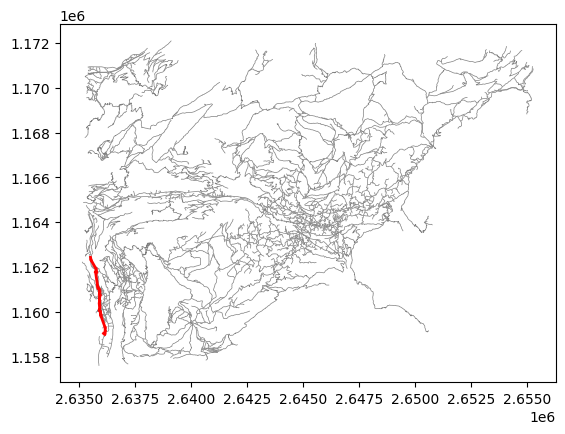

In [16]:
## load new graph
new_graph_file_path = "C:/Users/wlq92/Desktop/UZH/FS 2024/Geo 877/final_clean_combined.gpkg"
new_gdf = gpd.read_file(new_graph_file_path)

fig, ax = plt.subplots()
new_gdf.plot(ax=ax, edgecolor='gray', linewidth=0.5)

for i in range(len(path_4926_4946) - 1):
    start = path_4926_4946[i]
    end = path_4926_4946[i+1]
    start_node = road_graph.get_node(start)
    end_node = road_graph.get_node(end)
    ax.plot([start_node.x, end_node.x], [start_node.y, end_node.y], color='red', linewidth=2)

plt.show()